# Part II - Prosper Loan Data - The Relationship Between LoanStatus, Prosper Rating (Alpha) and EmploymentStatus 
## by Akande Emmanuel

## Investigation Overview

> Often times, people borrow loans from various "credit providing entities" and refuse to pay or pay just part of it. This usually causes set backs for such entities as they rely on prompt payment of these loans to stay afloat.  

> The sole purpose of this investigation is to show borrowers intent/ loan outcomes and communicate data findings using 3 of the 13 variables chosen from my project. Find below, definition of our variables:

**LoanStatus:**	The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

**ProsperRating (Alpha):**	The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

**EmploymentStatus:**	The employment status of the borrower at the time they posted the listing.

> Here, I chose to focus the relationship between LoanStatus, ProsperRating (Alpha) and EmploymentStatus.

> I begin with introducing the LoanStatus and ProsperRating (Alpha) variables. I then follow up with the transformed LoanStatus and ProsperRating (Alpha) count plot. 

> I then move on to introducing EmploymentStatus and showing the relationship between the LoanStatus and EmploymentStatus too.

> Next, I show the ProsperRating (Alpha) and EmploymentStatus relationship using the catplot and finally, I show the relatiosnhip between LoanStatus, ProsperRating (Alpha) and EmploymentStatus using both catplots under it. 

## Dataset Overview

>  The main data set contained 113,937 loans with 81 variables on each loan, including loan amount, borrower/ interest rate, current loan status, borrower income and many others. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
sb.set_palette("dark")
sb.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'whitesmoke'})

In [3]:
# load in the dataset into a pandas dataframe
prosper = pd.read_csv('prosperLoanData.csv')

In [4]:
#Quickly making a list of "columns of interests" and passing them to "main_columns"

main_columns = ['Term', 'LoanStatus', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus', 'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount', 'LoanOriginationDate']

In [5]:
#Assigning "main_columns" to a new dataframe, "prosper_main"

prosper_main = prosper[main_columns]

In [6]:
#But first, lets get an idea of how much missing values there are and what else we might find...

prosper_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   ProsperRating (Alpha)      84853 non-null   object 
 3   ListingCategory (numeric)  113937 non-null  int64  
 4   EmploymentStatus           111682 non-null  object 
 5   DelinquenciesLast7Years    112947 non-null  float64
 6   StatedMonthlyIncome        113937 non-null  float64
 7   TotalProsperLoans          22085 non-null   float64
 8   LoanOriginalAmount         113937 non-null  int64  
 9   LoanOriginationDate        113937 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 8.7+ MB


In [7]:
#quick clean... dropping missing values under "ProsperRating (Alpha)" using "dropna" and at same time, resetting the index so
#everything is in order...

prosper_main = prosper_main.dropna(subset=['ProsperRating (Alpha)']).reset_index()

In [8]:
#We'll fill all nans and missing values in "Total_ProsperLoans" with zero (0) to bring it up to uniformity... 

prosper_main['TotalProsperLoans'] = prosper_main['TotalProsperLoans'].fillna(0)

In [9]:
#Converting "LoanOriginationDate" from 'object' to 'date-time' and "StatedMonthlyIncome" from 'str' to 'int'

prosper_main['LoanOriginationDate'] = pd.to_datetime(prosper_main['LoanOriginationDate'])
prosper_main['StatedMonthlyIncome'] = pd.to_numeric(prosper_main['StatedMonthlyIncome'], errors='coerce').fillna(0).astype('int64').round(0)

In [10]:
#A last look at "prosper_main"...

prosper_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   Term                       84853 non-null  int64         
 2   LoanStatus                 84853 non-null  object        
 3   ProsperRating (Alpha)      84853 non-null  object        
 4   ListingCategory (numeric)  84853 non-null  int64         
 5   EmploymentStatus           84853 non-null  object        
 6   DelinquenciesLast7Years    84853 non-null  float64       
 7   StatedMonthlyIncome        84853 non-null  int64         
 8   TotalProsperLoans          84853 non-null  float64       
 9   LoanOriginalAmount         84853 non-null  int64         
 10  LoanOriginationDate        84853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage:

In [11]:
#I'll have to replace: the whole of "chargedoff" with "Defaulted", all "Past Due" within 30 days with "Current", all "Past Due" 
#beyond 30 days with "Defaulted" and "FinalPaymentInProgress" with "Current".

prosper_main['LoanStatus'] = prosper_main['LoanStatus'].replace(
    ['Chargedoff', 'Past Due (1-15 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 
     'Past Due (91-120 days)', 'Past Due (16-30 days)', 'FinalPaymentInProgress', 'Past Due (>120 days)'],
    ['Defaulted', 'Current', 'Defaulted', 'Defaulted', 'Defaulted', 'Current', 'Current', 'Defaulted']
)
prosper_main['LoanStatus'].value_counts() #Taking value counts again to confirm changes...

Current      57852
Completed    19664
Defaulted     7337
Name: LoanStatus, dtype: int64

Rationale for the changes:

Current Loan means an Eligible Loan as to which any Monthly Payment is less than 30 days past due as of any date of determination. (Source: https://www.lawinsider.com/dictionary/current-loan#)
A charge-off means the lender or creditor has written the account off as a loss, and the account is closed to future charges. (Source: https://www.equifax.com/personal/education/credit/report/charge-offs-faq/#)
Now, lets go visualize!

## (LoanStatus and ProsperRating (Alpha)

> LoanStatus was very much central to my analysis as it tells whether or not a loan payment was current, completed or defaulted. The LoanStatus column initially had 11 unique entries under it but I reduced it to just three - **Current**, **Defaulted** or **Completed**, as all entries were basically subsets of those three.

> ProsperRating (Alpha) tells of unique Alphabetical rating ascribed to each borrower. These ratings ranged from AA-HR.

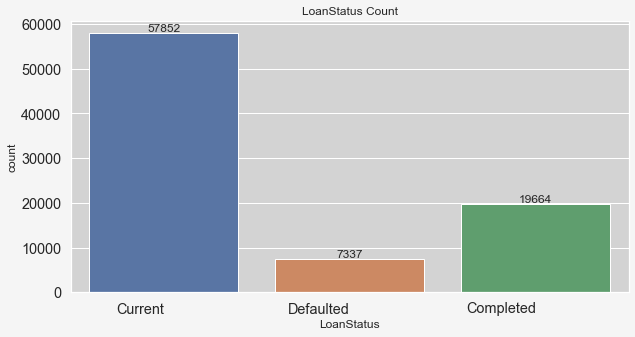

In [12]:
plt.figure(figsize = [10, 5]) #Setting size of the plot

ls = sb.countplot(data = prosper_main, x = 'LoanStatus'); #seaborn countplot passed off to function "ls"

plt.xticks(rotation=0, horizontalalignment='right', fontweight='light', fontsize='large') #xticks parameters entered

plt.yticks(rotation=0, horizontalalignment='right', fontweight='light', fontsize='large') #what I want my y-axis to look like?

ls.bar_label(ls.containers[0]) #labels on each of the bars so I know exactly what count each represent

ls.set_title('LoanStatus Count'); #title of plot


In [13]:
#We use a replace function...

prosper_main['EmploymentStatus'] = prosper_main['EmploymentStatus'].replace(['Full-time', 'Other'],['Employed', 'Part-time'])
    
prosper_main['EmploymentStatus'].value_counts()

Employed         75237
Self-employed     4538
Part-time         4062
Not employed       649
Retired            367
Name: EmploymentStatus, dtype: int64

## LoanStatus Vs EmploymentStatus
> The employment status initially housed 7 unique categories but it was transformed to 5 as two categories were basically subsets of two others. Here, I explore the relationship between the LoanStatus and EmploymentStatus. I see which category of borrowers, going by employment status, defaulted or completed most payments. 

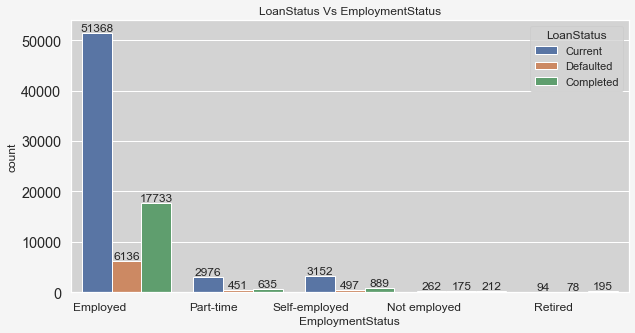

In [14]:
plt.figure(figsize = [10, 5])
lse = sb.countplot(data = prosper_main, x = 'EmploymentStatus', hue = 'LoanStatus');
plt.xticks(rotation=0, horizontalalignment='right', fontweight='light', fontsize='medium') #look of the gradings on x axis?

plt.yticks(rotation=0, horizontalalignment='right', fontweight='light', fontsize='large') #look of the gradings on y-axis

lse.bar_label(lse.containers[0]) #labelling each bar with a count so I know exactly what each represents...
lse.bar_label(lse.containers[1])
lse.bar_label(lse.containers[2])

lse.set_title('LoanStatus Vs EmploymentStatus'); #title of my plot..

## ProsperRating (Alpha) Vs EmploymentStatus

> It is becoming increasingly obvious that the most completed and defaulted payments came from the employed borrowers. Its only logical we see how the various EmploymentStatus is rated on the ProsperRating (Alpha) scale.



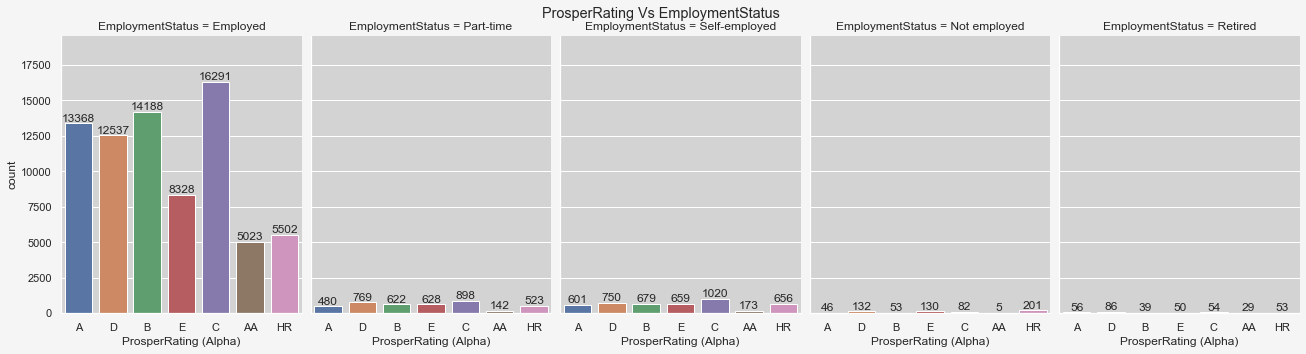

In [15]:
pr_e = sb.catplot(x='ProsperRating (Alpha)', data=prosper_main, kind='count', col='EmploymentStatus')
pr_e.fig.set_size_inches(18, 5)
pr_e.fig.subplots_adjust(top=0.9)

pr_e.fig.suptitle('ProsperRating Vs EmploymentStatus')

for ax in pr_e.axes.ravel():
    
    for c in ax.containers:
        labels = [(v.get_height()) for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

## LoanStatus Vs ProsperRating (Alpha) Vs EmploymentStatus

> The least assigned ProsperRating amongst Employed was AA. 1694 borrowers got it. And The most assigned ProsperRating amongst same subset was D. 5171 borrowers got it. How does this statistics change when we factor LoanStatus into it?



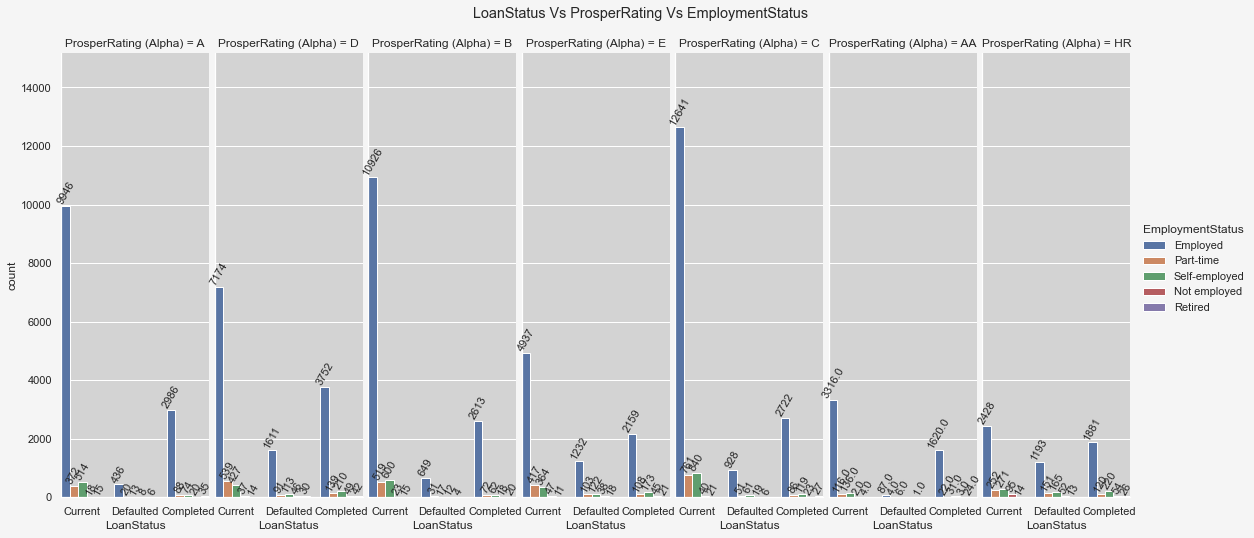

In [16]:
#First, lets see a visual of counts for Employed borrowers with Completed and Defaulted loans based on their ProsperRatings... 

loan_prosper_emp = sb.catplot(x='LoanStatus', data=prosper_main, kind='count', col='ProsperRating (Alpha)', hue='EmploymentStatus', col_wrap=7, legend=True)
loan_prosper_emp.fig.set_size_inches(17,8)
loan_prosper_emp.fig.subplots_adjust(top=0.9, right=0.9)

loan_prosper_emp.fig.suptitle('LoanStatus Vs ProsperRating Vs EmploymentStatus')

for ax in loan_prosper_emp.axes.ravel():
    
    for c in ax.containers:
        labels = [(v.get_height()) for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', rotation=60, size=11)
    ax.margins(y=0.2)
    ax.margins(x=0)
plt.show()

In [17]:
#Now, we find Completed to Defaulted ratios for each ProsperRating (Alpha)...
emp_prosp_ratio_AA = 1620/87
emp_prosp_ratio_A = 2986/436
emp_prosp_ratio_B = 2613/649
emp_prosp_ratio_C = 2722/928
emp_prosp_ratio_D = 3752/1611
emp_prosp_ratio_E = 2159/1232
emp_prosp_ratio_HR = 1881/1193

In [18]:
#We create a quick data dictionary (emp_prosp_ratio) from above ratios and pass it into a new dataframe, prosp_ratio..
emp_prosp_ratio  = {'ratios': [18.62, 6.85, 4.03, 2.93, 2.33, 1.75, 1.58], 'prosper_rating': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']}
prosp_ratio = pd.DataFrame(emp_prosp_ratio)

## ProsperRating (Alpha) Vs Completed to Defaulted Ratios Of Employed Borrowers


> Borrowers that were employed tended to enjoy higher ProsperRating than all other groups and Employed borrowers clearly completed the most payments of all. Interestingly, they also defaulted the most, as they formed the largest set of borrowers anyway. One interesting angle to explore would have been the ratio of completed payments to defaults within the Employed.

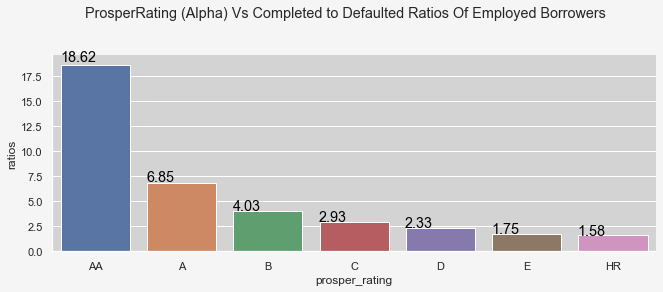

In [19]:
#Straight to visuals...

ratio_prosp = sb.catplot(x='prosper_rating', y='ratios', data=prosp_ratio, kind='bar', legend=True)
ratio_prosp.fig.set_size_inches(12,4)
ratio_prosp.fig.subplots_adjust(top=0.81,right=0.86)
ratio_prosp.fig.suptitle('ProsperRating (Alpha) Vs Completed to Defaulted Ratios Of Employed Borrowers')

ax = ratio_prosp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
            format(p.get_height()),
            color='black', 
            rotation='horizontal', 
            size='large')

In [20]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 605628 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\envs\my_trial_env\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\envs\my_trial_env\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\envs\my_trial_env\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\envs\my_trial_env\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP\envs\my_trial_env\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(no